<a href="https://colab.research.google.com/github/yuxuan0702/PUBG-GAME-Analysis/blob/master/PUBG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering 
plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import survey dataset 
df = pd.read_csv('/content/drive/My Drive/Website_notebook/pubg/survey_result.csv')
df = df[df['Have you ever play ']==1]
df.drop(columns=['Index','Have you ever play '],inplace = True)
df.head()

,Match_Duration,Match_Type,Boosts,Heals number,Damage,DBNOs,Kills,Healing,Kill Ranking,Enemy Kill,Kill Strike,Longest Kill,Revives,Ride Distance,Road Kills,Swim Distance,Team Kills,Vehicle distance,Walking Distance,Weapon Acquired
1,5.0,2.0,2.0,1.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,3.0,3.0,2.0,5.0,1.0,5.0,1.0,1.0,1.0
5,5.0,5.0,5.0,3.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
7,3.0,4.0,3.0,2.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0
9,4.0,2.0,5.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,4.0
11,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,4.0,1.0,5.0,5.0,5.0,5.0


In [0]:
# survey data visual
category_names = ['Strongly disagree',
                  'Disagree',
                  'Neither agree nor disagree',
                  'Agree',
                  'Strongly agree']

In [0]:
# survey data 
def survey(results, category_names,title):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    return fig, ax


In [0]:
result = {
    'Match_Duration' : [10,12,24,17,14],
    'Match_Type' : [5,5,23,23,21],
    'Damage': [3,5,15,26,28],
    'DBNOs': [1,5,15,27,29],
    'Kills': [6,9,22,22,18],
    'KillRanking':[5,6,20,23,23],
    'Enemy Kill':[4,7,12,21,33],
    'Kill Strike': [9,13,20,19,16],
    'Longest Kill':[11,15,23,14,14],
    'Ride Distance':[18,18,27,8,6],
    'Road Kills':[24,18,16,12,7],
    'Swim Distance': [39,16,14,4,4],
    'Team Kills':[39,10,15,6,7],
    'Vehicle Distance':[37,8,22,5,5],
    'Walking distance': [24,13,21,12,7],
    'Weapon distance': [ 11,5,24,18,19],
    'Healing': [4,12,27,18,16],
    'Revives': [6,14,27,13,17],
    'Boost' : [8,12,19,23,15],
    'Heal Number' : [3,8,24,27,15]
}

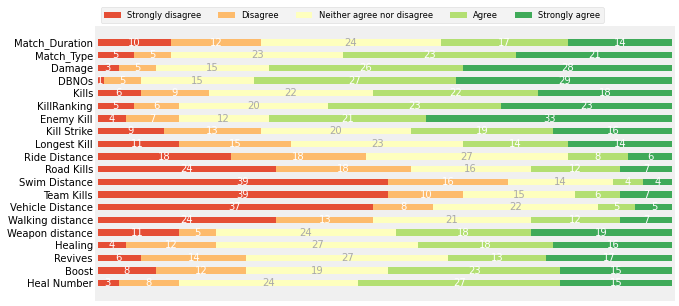

In [6]:
# survey result stack plot 
title = 'Match Characteristic Distribution'
survey(result, category_names,title)
plt.show()

In [7]:
#import data 
data = pd.read_csv('/content/drive/My Drive/Website_notebook/pubg/1000_rows_dataset_new.csv')
data.drop(columns=['Unnamed: 0', 'Id', 'groupId', 'matchId'],inplace=True)
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,1,0.0,0,0,2,50,0,0,0,0.00,1885,duo-fpp,42,39,1546,0,3756.0,0,0.000,0,0,1560.0,3,0,0.4878
1,0,0,0.0,0,0,0,96,1164,0,0,0.00,1496,duo-fpp,50,48,-1,0,0.0,0,0.000,0,0,0.0,0,1477,0.0000
2,0,0,154.2,1,0,0,28,1416,1,1,12.89,1461,squad-fpp,28,27,-1,0,0.0,0,0.000,0,0,1245.0,5,1552,0.5556
3,0,0,0.0,0,0,0,52,0,0,0,0.00,1896,solo,95,92,1536,0,4652.0,0,7.831,0,0,2197.0,5,0,0.7021
4,2,3,215.0,1,0,8,29,1149,1,1,43.97,1367,duo,48,43,-1,0,908.4,0,0.000,0,0,1202.0,6,1494,0.6383


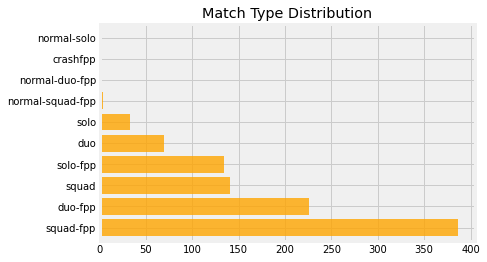

In [8]:
# match type distribution plot 
data['matchType'].value_counts().plot(kind='barh',color='orange',width = 0.8,alpha = 0.8)
plt.title('Match Type Distribution')
plt.show()

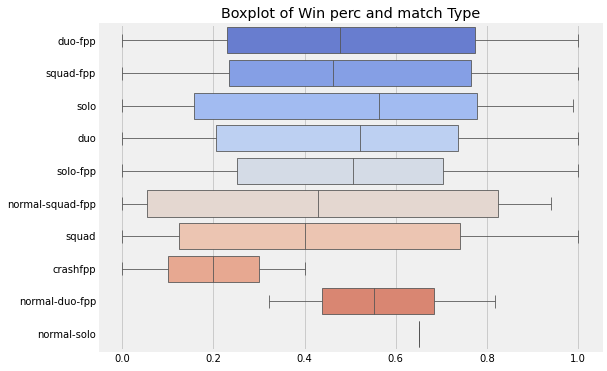

In [9]:
# box plot of match type and winplace perc 
plt.figure(figsize=(8,6))
sns.boxplot(data =data , y = 'matchType',x = 'winPlacePerc',palette = 'coolwarm',linewidth=0.8)
plt.title('Boxplot of Win perc and match Type')
plt.xlabel('')
plt.ylabel('')
plt.show()

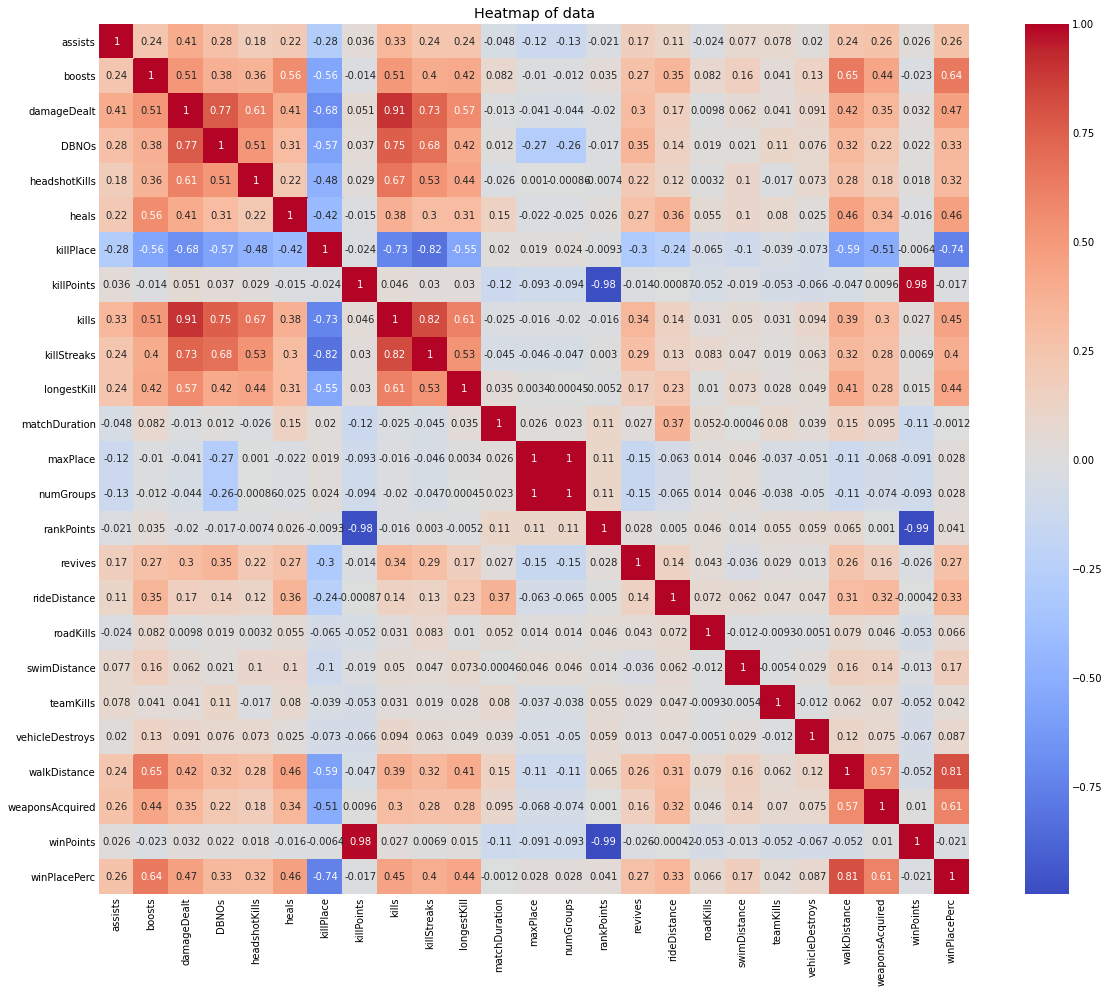

In [10]:
# correlation heatmap
plt.figure(figsize=(18,16))
sns.heatmap(data.drop(columns=['matchType']).corr(),cmap = 'coolwarm',annot=True,square=True)
plt.title('Heatmap of data')
plt.show()

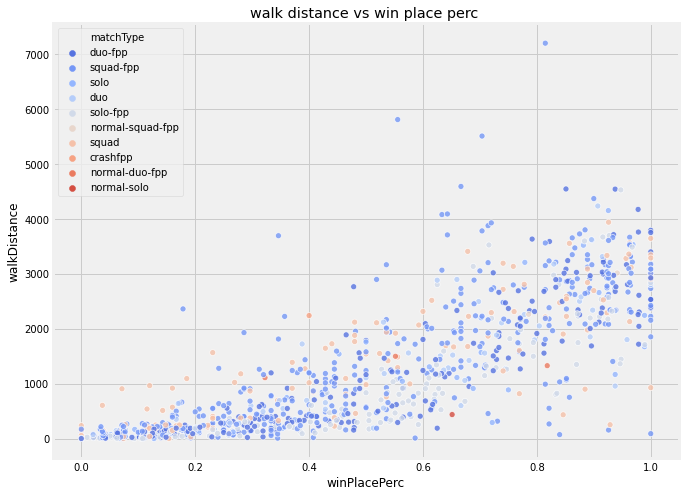

In [11]:
# scatter plot walk distance vs win place perc
plt.figure(figsize=(10,8))
sns.scatterplot(data = data ,x = 'winPlacePerc',y = 'walkDistance', hue = 'matchType',palette = 'coolwarm', alpha =0.8 )
plt.title('walk distance vs win place perc ')
plt.legend()
plt.show()

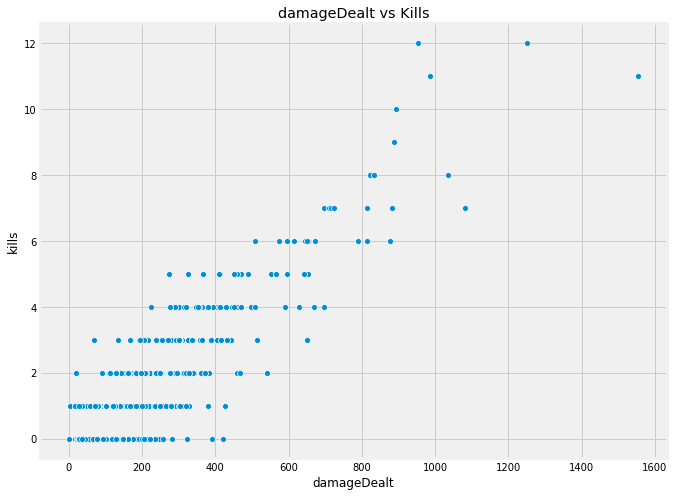

In [12]:
# scatter plot kills vs damagedealt 
plt.figure(figsize=(10,8))
sns.scatterplot(data = data, x= 'damageDealt',y='kills')
plt.title('damageDealt vs Kills')
plt.show()